# Kaggle Santander Customer Transaction Prediction competition: 
# Using Gaussian Naive Bayes
https://www.kaggle.com/c/santander-customer-transaction-prediction

## Gaussian Naive Bayes: in this case a good classifier other than boosting :)

As always boosting methods give great results, but in this competition a good option is Gaussian Naive Bayes.  
This is because the variables all have only small correlations, so the features are independent of eachother.  
Independence is one of the assumptions of Naive Bayes.

## Import necessary sklearn packages

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

## Read in train and test data

In [2]:
train = pd.read_csv('santander-customer-transaction-prediction/train.csv', header=0).drop(columns='ID_code')
train.head(3)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.925,-6.786,11.908,5.093,11.461,-9.283,5.119,18.627,-4.920,...,4.435,3.964,3.136,1.691,18.523,-2.398,7.878,8.563,12.780,-1.091
1,0,11.501,-4.147,13.859,5.389,12.362,7.043,5.621,16.534,3.147,...,7.642,7.721,2.584,10.952,15.431,2.034,8.127,8.789,18.356,1.952
2,0,8.609,-2.746,12.081,7.893,10.582,-9.084,6.943,14.616,-4.919,...,2.906,9.790,1.670,1.686,21.604,3.142,-6.521,8.268,14.722,0.397


In [3]:
test = pd.read_csv('santander-customer-transaction-prediction/test.csv', header=0)
test.head(3)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.066,7.780,12.954,9.429,11.433,-2.381,5.849,18.267,2.134,...,-2.156,11.850,-1.430,2.451,13.711,2.467,4.365,10.720,15.472,-8.720
1,test_1,8.530,1.254,11.305,5.186,9.197,-4.012,6.020,18.632,-4.413,...,10.617,8.835,0.940,10.128,15.576,0.477,-1.485,9.871,19.129,-20.976
2,test_2,5.483,-10.358,10.141,7.048,10.263,9.805,4.895,20.254,1.523,...,-0.748,10.993,1.980,2.180,12.981,2.128,-7.109,7.062,19.896,-23.179


## Separate target and feature data

In [4]:
feature_columns = [column_name for column_name in train.columns if column_name != 'target']

X_train = train[feature_columns]
y_train = train['target']

X_test = test[feature_columns]

## Normalize the data
In this case normalizing almost doesn't add anything to the quality of predictions, but it's a good habit anyways.

In [5]:
normalizer = StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

## Fit the data using a Gaussian Naive Bayes Classifier

In [6]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_norm, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Check the Area Under the Curve scores

In [7]:
auc_score_x_train = roc_auc_score(y_train, gaussian_nb.predict_proba(X_train_norm)[:, 1])
print(f'roc score on normalized X_train data: {auc_score_x_train.round(3)}')

roc score on normalized X_train data: 0.89


In [8]:
gauss_nb_norm_scores = cross_val_score(gaussian_nb, X_train_norm, y_train, cv=5, scoring='roc_auc')
print(f'mean cross validation score: {gauss_nb_norm_scores.mean().round(3)}')

mean cross validation score: 0.888


## Use the classifier to predict probabilies on the test set

In [9]:
gaussian_nb_submission = test['ID_code'].to_frame()

In [10]:
gaussian_nb_submission['target'] = gaussian_nb.predict_proba(X_test_norm)[:, 1]
gaussian_nb_submission.head(3)

,ID_code,target
0,test_0,0.109
1,test_1,0.187
2,test_2,0.200


## Visualize predicted probabilities for the test set

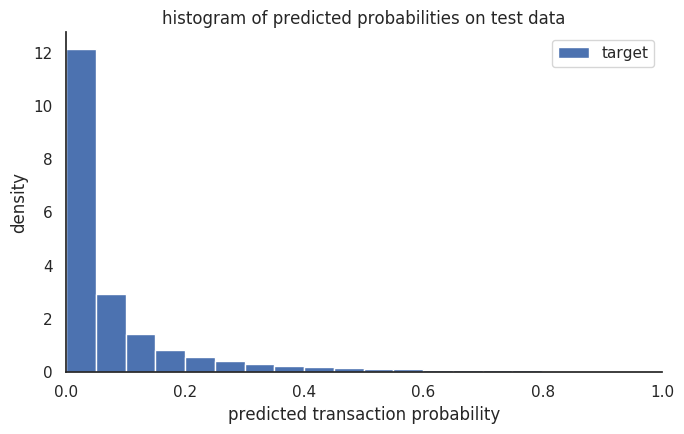

In [11]:
ax = gaussian_nb_submission.plot.hist(bins=20, density=True)
ax.set(
    title='histogram of predicted probabilities on test data',
    xlabel='predicted transaction probability', 
    ylabel='density',
    xlim=(0.0, 1.0),
)
sns.despine()
plt.tight_layout();

## Create the submission csv for Kaggle

In [13]:
gaussian_nb_submission.to_csv('gaussian_nb.csv', header=True, index=False)

## Leaderboard score for this model: AUC 0.888